# Imports

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read and Cleanup

In [3]:
# Read in full Motor Vehicle Collision Dataset
mvc_df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\3333524029.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc_df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [4]:
# Output column names
mvc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026647 entries, 0 to 2026646
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [5]:
# Use DropNA to clean
mvc_df_cleaned = mvc_df.dropna(axis='index', how='any', subset=[#'CRASH DATE',
                                                                #'CRASH TIME',
                                                                'BOROUGH'
                                                                #'ZIP CODE',                                                                
                                                                #'LOCATION',
                                                                #'CROSS STREET NAME',                                                                
                                                                #'NUMBER OF PERSONS INJURED',
                                                                #'NUMBER OF PERSONS KILLED',
                                                                #'NUMBER OF PEDESTRIANS INJURED',
                                                                #'NUMBER OF PEDESTRIANS KILLED',
                                                                #'NUMBER OF MOTORIST INJURED',
                                                                #'NUMBER OF MOTORIST KILLED',
                                                                #'CONTRIBUTING FACTOR VEHICLE 1',
                                                                #'VEHICLE TYPE CODE 1'
                                                                ])
print(f"Num entries: {len(mvc_df_cleaned)}")

Num entries: 1396206


In [6]:
# Strip/Trim the columns
mvc_df_cleaned.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

# mvc_df_cleaned = mvc_df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\2893477256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned.replace('(^\s+|\s+$)', '', regex=True, inplace=True)


In [7]:
# Convert Dates and Times
from datetime import datetime
date_format = '%m/%d/%Y'
time_format = '%H:%M'

mvc_df_cleaned['CRASH DATE'] = pd.to_datetime(mvc_df_cleaned['CRASH DATE'])
mvc_df_cleaned['DAY OF WEEK'] = mvc_df_cleaned['CRASH DATE'].dt.day_of_week

MVC_Test = mvc_df_cleaned.copy()

mvc_df_cleaned['CRASH TIME'] = pd.to_datetime(mvc_df_cleaned['CRASH TIME'])

display(mvc_df_cleaned.info())
display(mvc_df_cleaned.head())





C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\1803742114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CRASH DATE'] = pd.to_datetime(mvc_df_cleaned['CRASH DATE'])
C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\1803742114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['DAY OF WEEK'] = mvc_df_cleaned['CRASH DATE'].dt.day_of_week
C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\1803742114.py:11: UserWarning: Could not infer format, so each element will be parse

<class 'pandas.core.frame.DataFrame'>
Index: 1396206 entries, 3 to 2026646
Data columns (total 30 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1396206 non-null  datetime64[ns]
 1   CRASH TIME                     1396206 non-null  datetime64[ns]
 2   BOROUGH                        1396206 non-null  object        
 3   ZIP CODE                       1395966 non-null  object        
 4   LATITUDE                       1359808 non-null  float64       
 5   LONGITUDE                      1359808 non-null  float64       
 6   LOCATION                       1359808 non-null  object        
 7   ON STREET NAME                 1095362 non-null  object        
 8   CROSS STREET NAME              1094795 non-null  object        
 9   OFF STREET NAME                300283 non-null   object        
 10  NUMBER OF PERSONS INJURED      1396195 non-null  float64   

None

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DAY OF WEEK
3,2021-09-11,2023-10-04 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,5
4,2021-12-14,2023-10-04 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,1
7,2021-12-14,2023-10-04 08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,1
8,2021-12-14,2023-10-04 21:10:00,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,1
9,2021-12-14,2023-10-04 14:58:00,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1


In [8]:
# Trying to extract time only and keep it as datetime object

MVC_Test_2 = MVC_Test.copy()
MVC_Test_2['CRASH TIME'] = pd.to_datetime(MVC_Test_2['CRASH TIME'])
MVC_Test_2['CRASH TIME'] = MVC_Test_2['CRASH TIME'].dt.time
MVC_Test_2['CRASH TIME'].info()


C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\1549692236.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MVC_Test_2['CRASH TIME'] = pd.to_datetime(MVC_Test_2['CRASH TIME'])


<class 'pandas.core.series.Series'>
Index: 1396206 entries, 3 to 2026646
Series name: CRASH TIME
Non-Null Count    Dtype 
--------------    ----- 
1396206 non-null  object
dtypes: object(1)
memory usage: 21.3+ MB


In [38]:
# Add Number of persons killed and injured total
mvc_df_cleaned['TOTAL NUMBER KILLED'] = mvc_df_cleaned['NUMBER OF CYCLIST KILLED'] \
                                        + mvc_df_cleaned['NUMBER OF MOTORIST KILLED'] \
                                        + mvc_df_cleaned['NUMBER OF PEDESTRIANS KILLED'] \
                                        + mvc_df_cleaned['NUMBER OF PERSONS KILLED']

mvc_df_cleaned['TOTAL NUMBER INJURED'] = mvc_df_cleaned['NUMBER OF CYCLIST INJURED'] \
                                        + mvc_df_cleaned['NUMBER OF MOTORIST INJURED'] \
                                        + mvc_df_cleaned['NUMBER OF PEDESTRIANS INJURED'] \
                                        + mvc_df_cleaned['NUMBER OF PERSONS INJURED']

C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\743709953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['TOTAL NUMBER KILLED'] = mvc_df_cleaned['NUMBER OF CYCLIST KILLED'] \
C:\Users\pawan\AppData\Local\Temp\ipykernel_28400\743709953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['TOTAL NUMBER INJURED'] = mvc_df_cleaned['NUMBER OF CYCLIST INJURED'] \


# Copy the data and preserve original

In [39]:
# Make a copy so that original is preserved

MVC = mvc_df_cleaned.copy()
MVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1396206 entries, 3 to 2026646
Data columns (total 32 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1396206 non-null  datetime64[ns]
 1   CRASH TIME                     1396206 non-null  datetime64[ns]
 2   BOROUGH                        1396206 non-null  object        
 3   ZIP CODE                       1395966 non-null  object        
 4   LATITUDE                       1359808 non-null  float64       
 5   LONGITUDE                      1359808 non-null  float64       
 6   LOCATION                       1359808 non-null  object        
 7   ON STREET NAME                 1095362 non-null  object        
 8   CROSS STREET NAME              1094795 non-null  object        
 9   OFF STREET NAME                300283 non-null   object        
 10  NUMBER OF PERSONS INJURED      1396195 non-null  float64   

# Special Constraints / Conditions Added Here

In [40]:
# Reduce scope to only 2018 and later for COVID focus

MVC = MVC[MVC['CRASH DATE'].dt.year >= 2018]
MVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546582 entries, 3 to 2026646
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     546582 non-null  datetime64[ns]
 1   CRASH TIME                     546582 non-null  datetime64[ns]
 2   BOROUGH                        546582 non-null  object        
 3   ZIP CODE                       546459 non-null  object        
 4   LATITUDE                       531036 non-null  float64       
 5   LONGITUDE                      531036 non-null  float64       
 6   LOCATION                       531036 non-null  object        
 7   ON STREET NAME                 342434 non-null  object        
 8   CROSS STREET NAME              342212 non-null  object        
 9   OFF STREET NAME                204147 non-null  object        
 10  NUMBER OF PERSONS INJURED      546578 non-null  float64       
 11  NUMB

# Real Work Starts Here!

<Axes: xlabel='BOROUGH'>

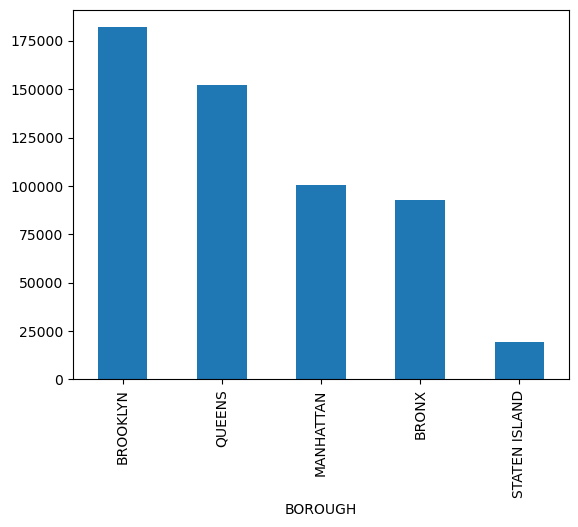

In [41]:
# Split into boroughs and describe
MVC_Brooklyn = MVC[MVC['BOROUGH'] == 'BROOKLYN']
MVC_Manhattan = MVC[MVC['BOROUGH'] == 'MANHATTAN']
MVC_Queens = MVC[MVC['BOROUGH'] == 'QUEENS']
MVC_Bronx = MVC[MVC['BOROUGH'] == 'BRONX']
MVC_StatenIsland = MVC[MVC['BOROUGH'] == 'STATEN ISLAND']

MVC['BOROUGH'].value_counts().plot.bar()


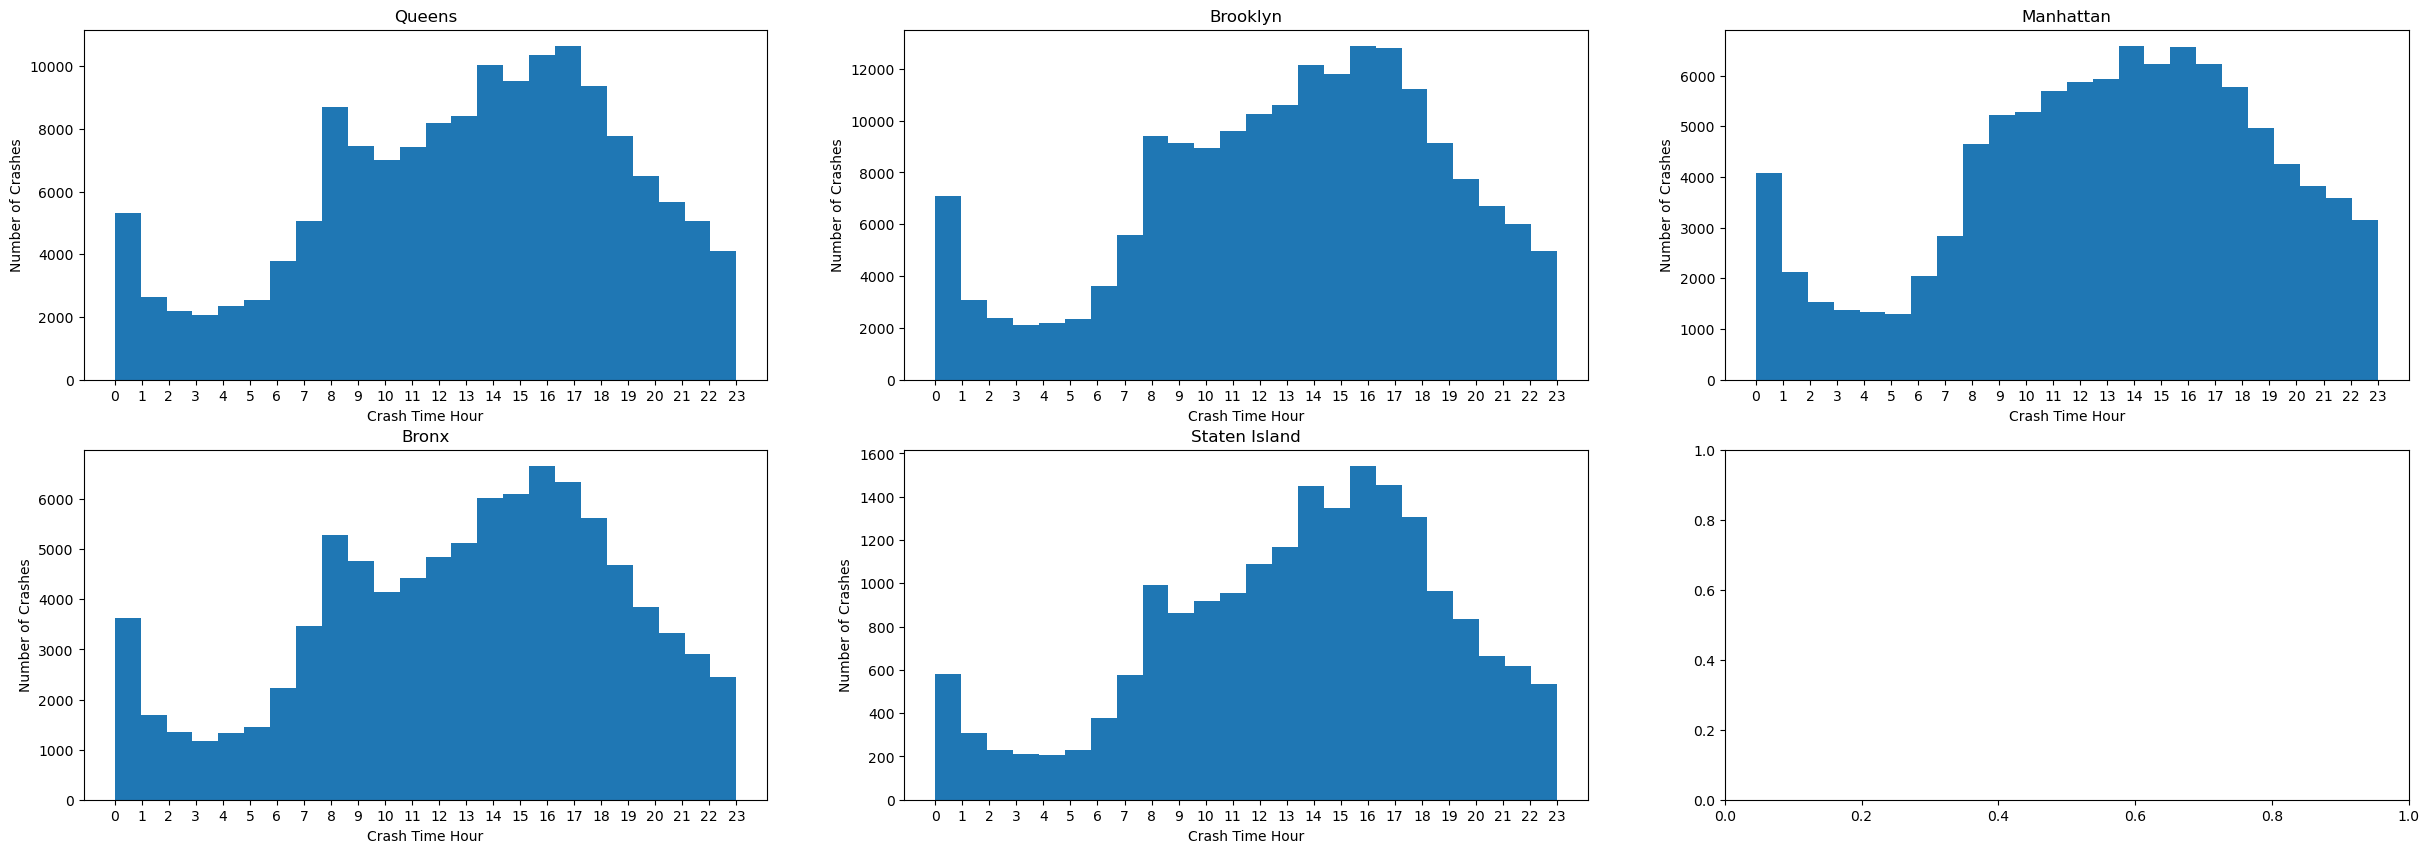

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(30,10))
axs[0][0].hist(MVC_Queens['CRASH TIME'].dt.hour, bins=24)
axs[0][0].set_xticks(np.arange(0, 24))
axs[0][0].set_xlabel("Crash Time Hour")
axs[0][0].set_ylabel("Number of Crashes")
axs[0][0].set_title('Queens')

axs[0][1].hist(MVC_Brooklyn['CRASH TIME'].dt.hour, bins=24)
axs[0][1].set_xticks(np.arange(0, 24))
axs[0][1].set_xlabel("Crash Time Hour")
axs[0][1].set_ylabel("Number of Crashes")
axs[0][1].set_title('Brooklyn')

axs[0][2].hist(MVC_Manhattan['CRASH TIME'].dt.hour, bins=24)
axs[0][2].set_xticks(np.arange(0, 24))
axs[0][2].set_xlabel("Crash Time Hour")
axs[0][2].set_ylabel("Number of Crashes")
axs[0][2].set_title('Manhattan')

axs[1][0].hist(MVC_Bronx['CRASH TIME'].dt.hour, bins=24)
axs[1][0].set_xticks(np.arange(0, 24))
axs[1][0].set_xlabel("Crash Time Hour")
axs[1][0].set_ylabel("Number of Crashes")
axs[1][0].set_title('Bronx')

axs[1][1].hist(MVC_StatenIsland['CRASH TIME'].dt.hour, bins=24)
axs[1][1].set_xticks(np.arange(0, 24))
axs[1][1].set_xlabel("Crash Time Hour")
axs[1][1].set_ylabel("Number of Crashes")
axs[1][1].set_title('Staten Island')
plt.show()


[Text(0.5, 1.0, 'Staten Island')]

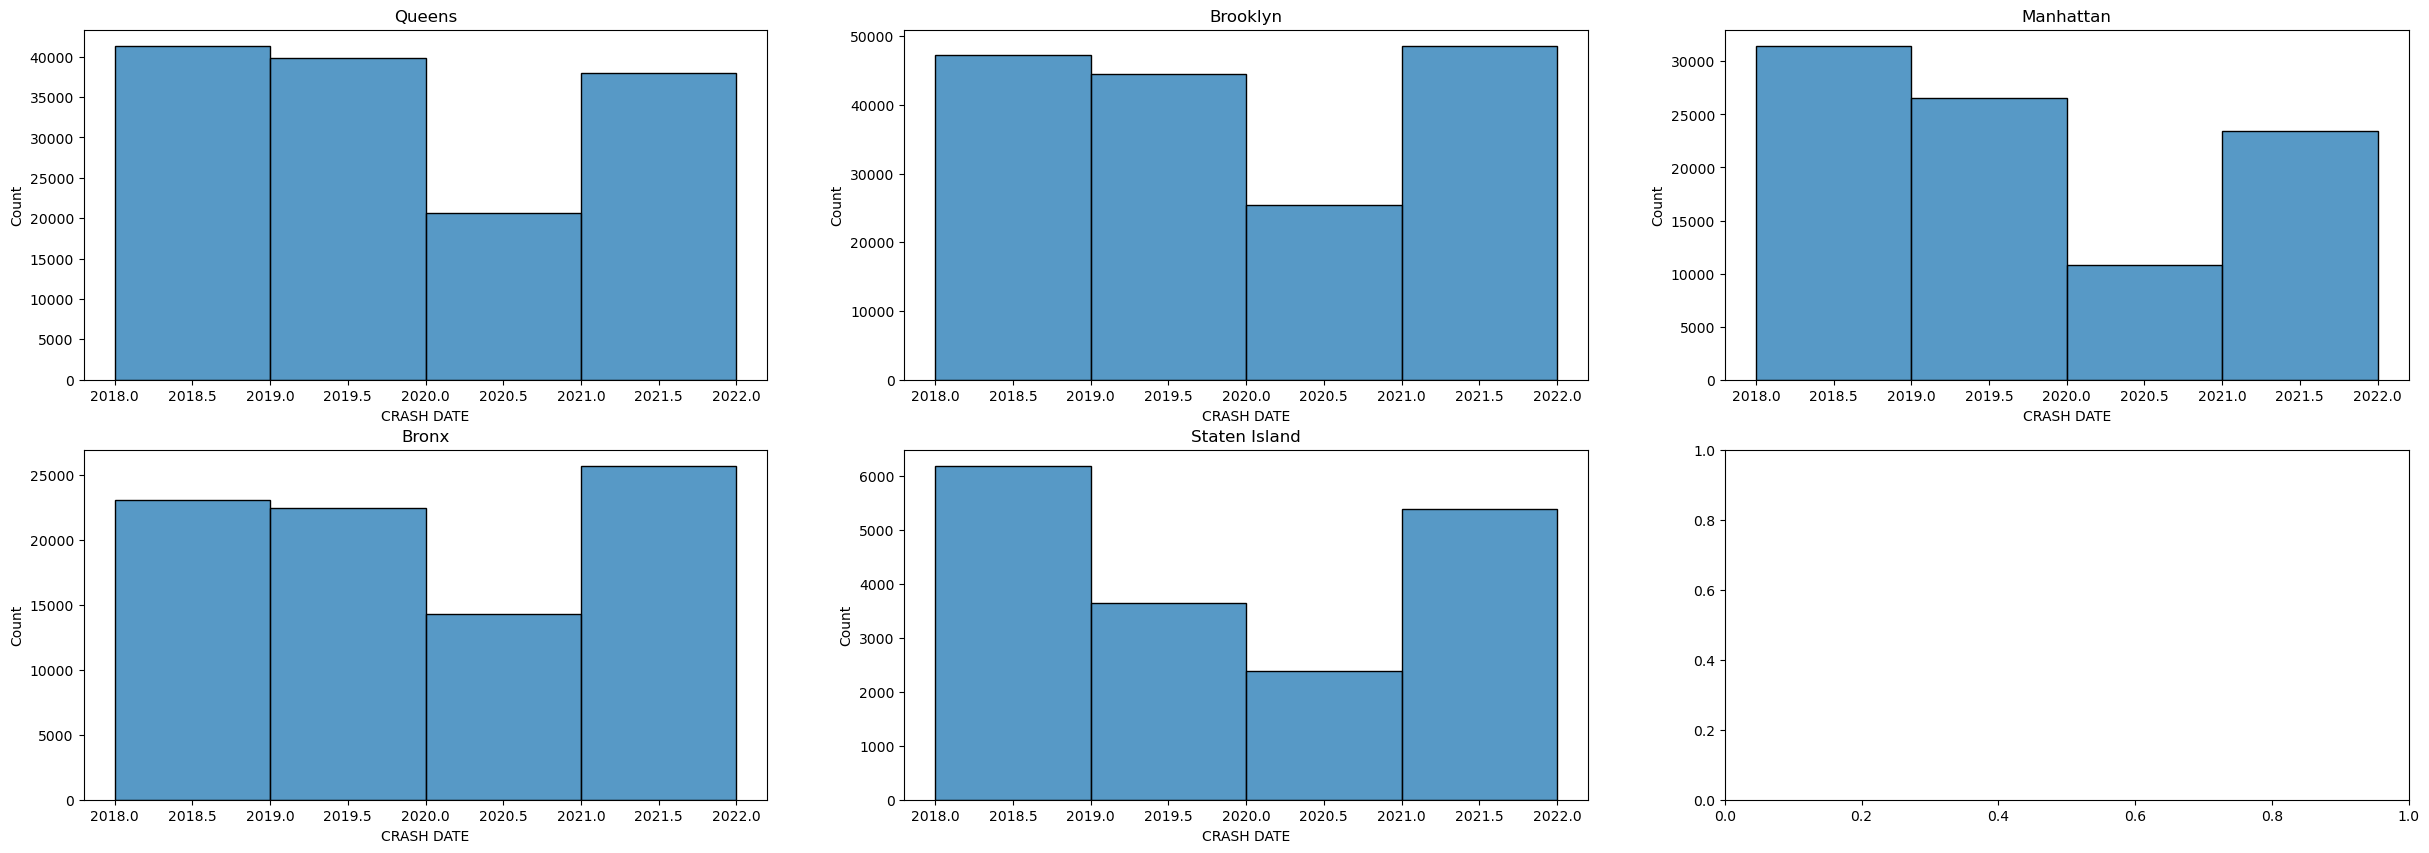

In [43]:
fig, axs = plt.subplots(2,3, figsize=(30,10))

sns.histplot(MVC_Queens['CRASH DATE'].dt.year, 
             bins=range(min(MVC_Queens['CRASH DATE'].dt.year), 
                        max(MVC_Queens['CRASH DATE'].dt.year)), 
            ax=axs[0][0]).set(title="Queens")

sns.histplot(MVC_Brooklyn['CRASH DATE'].dt.year, 
             bins=range(min(MVC_Brooklyn['CRASH DATE'].dt.year), 
                        max(MVC_Brooklyn['CRASH DATE'].dt.year)), 
            ax=axs[0][1]).set(title="Brooklyn")

sns.histplot(MVC_Manhattan['CRASH DATE'].dt.year, 
             bins=range(min(MVC_Manhattan['CRASH DATE'].dt.year), 
                        max(MVC_Manhattan['CRASH DATE'].dt.year)), 
            ax=axs[0][2]).set(title="Manhattan")

sns.histplot(MVC_Bronx['CRASH DATE'].dt.year, 
             bins=range(min(MVC_Bronx['CRASH DATE'].dt.year), 
                        max(MVC_Bronx['CRASH DATE'].dt.year)), 
            ax=axs[1][0]).set(title="Bronx")

sns.histplot(MVC_StatenIsland['CRASH DATE'].dt.year, 
             bins=range(min(MVC_StatenIsland['CRASH DATE'].dt.year), 
                        max(MVC_StatenIsland['CRASH DATE'].dt.year)), 
            ax=axs[1][1]).set(title="Staten Island")
            


Text(0.5, 1.0, 'Staten Island')

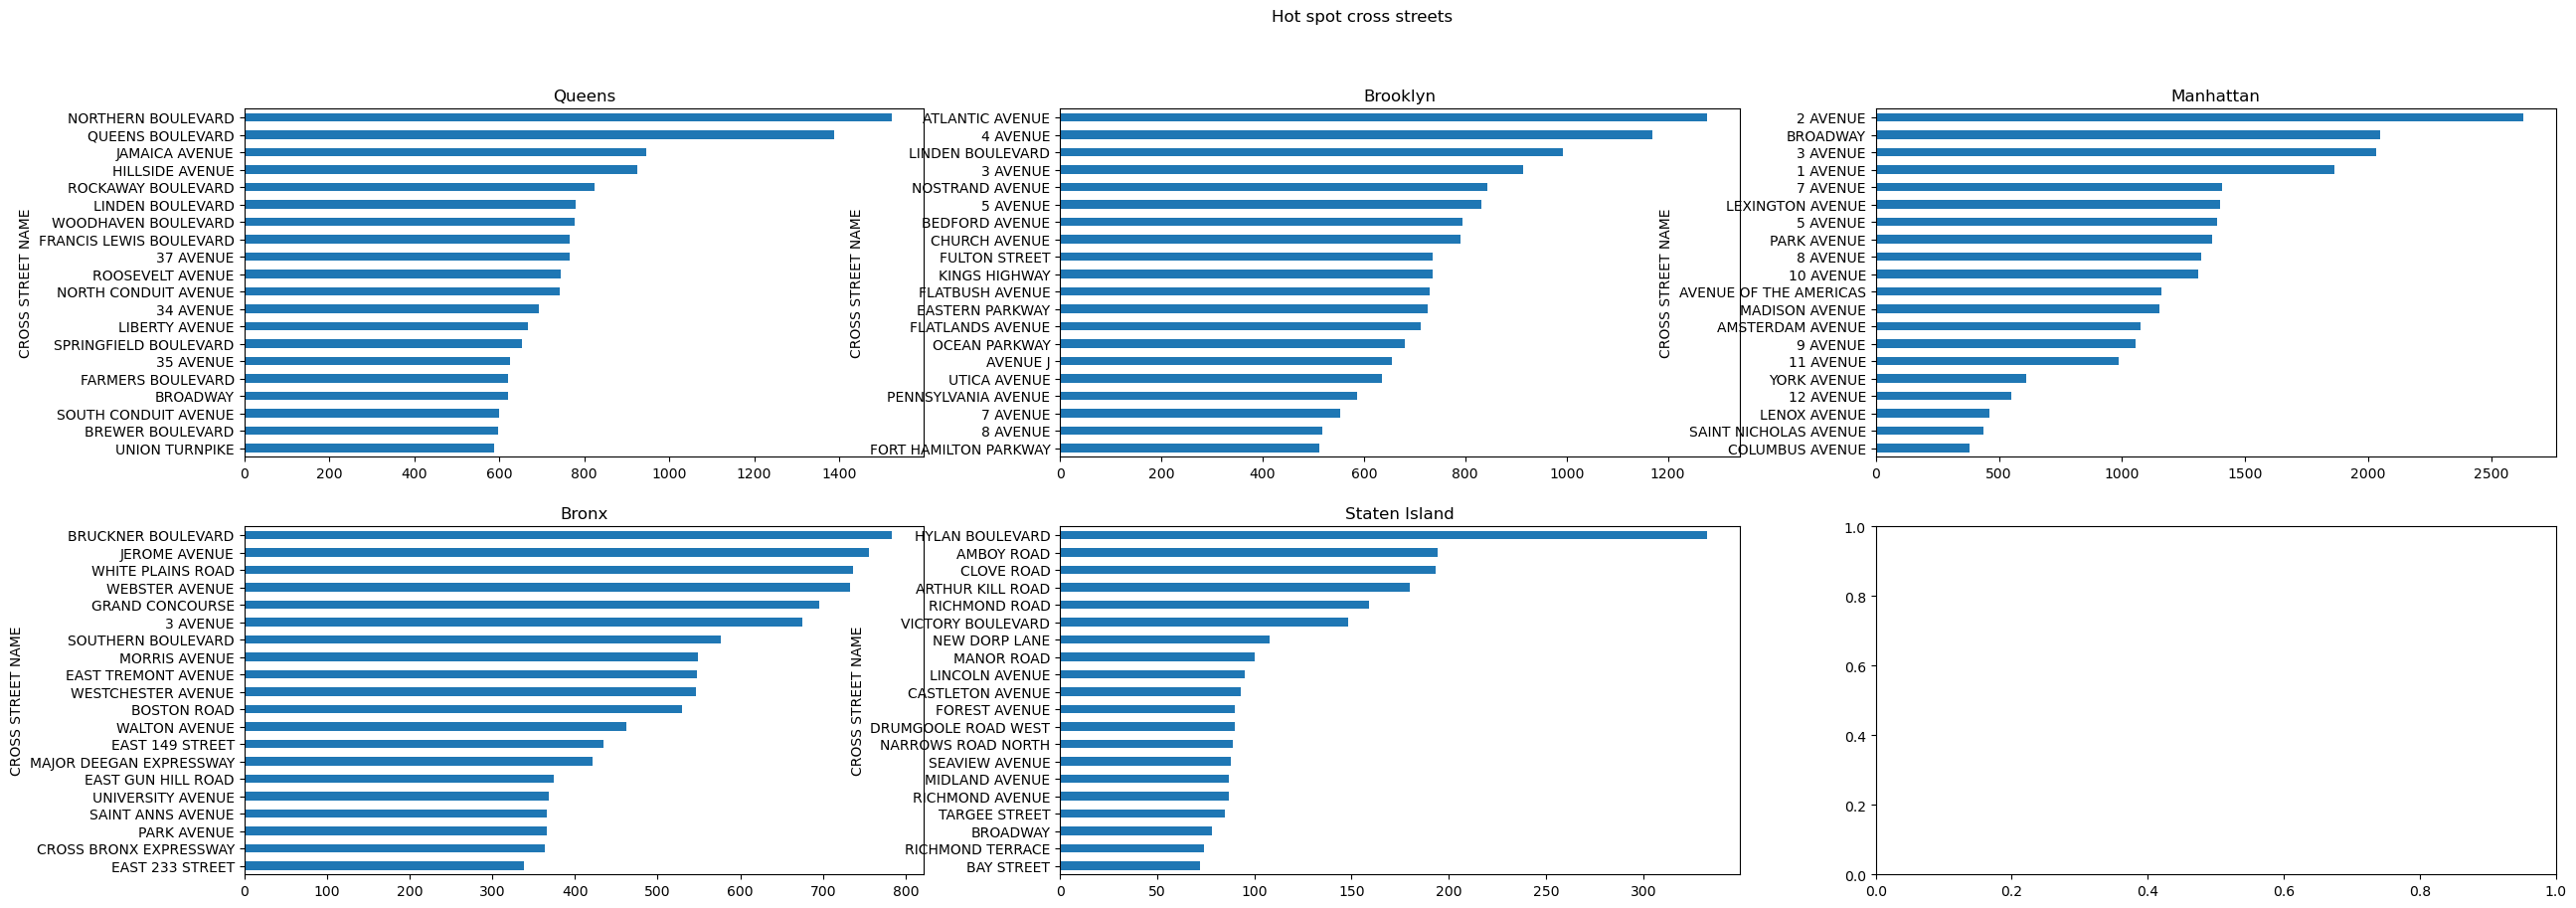

In [44]:
# Check if there are hotspots
fig, axs = plt.subplots(2,3, figsize=(30,10))
fig.suptitle("Hot spot cross streets")

MVC_Queens['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[0][0])
axs[0][0].set_title("Queens")

MVC_Brooklyn['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[0][1])
axs[0][1].set_title("Brooklyn")

MVC_Manhattan['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[0][2])
axs[0][2].set_title("Manhattan")

MVC_Bronx['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[1][0])
axs[1][0].set_title("Bronx")

MVC_StatenIsland['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[1][1])
axs[1][1].set_title("Staten Island")


Text(0.5, 1.0, 'Staten Island')

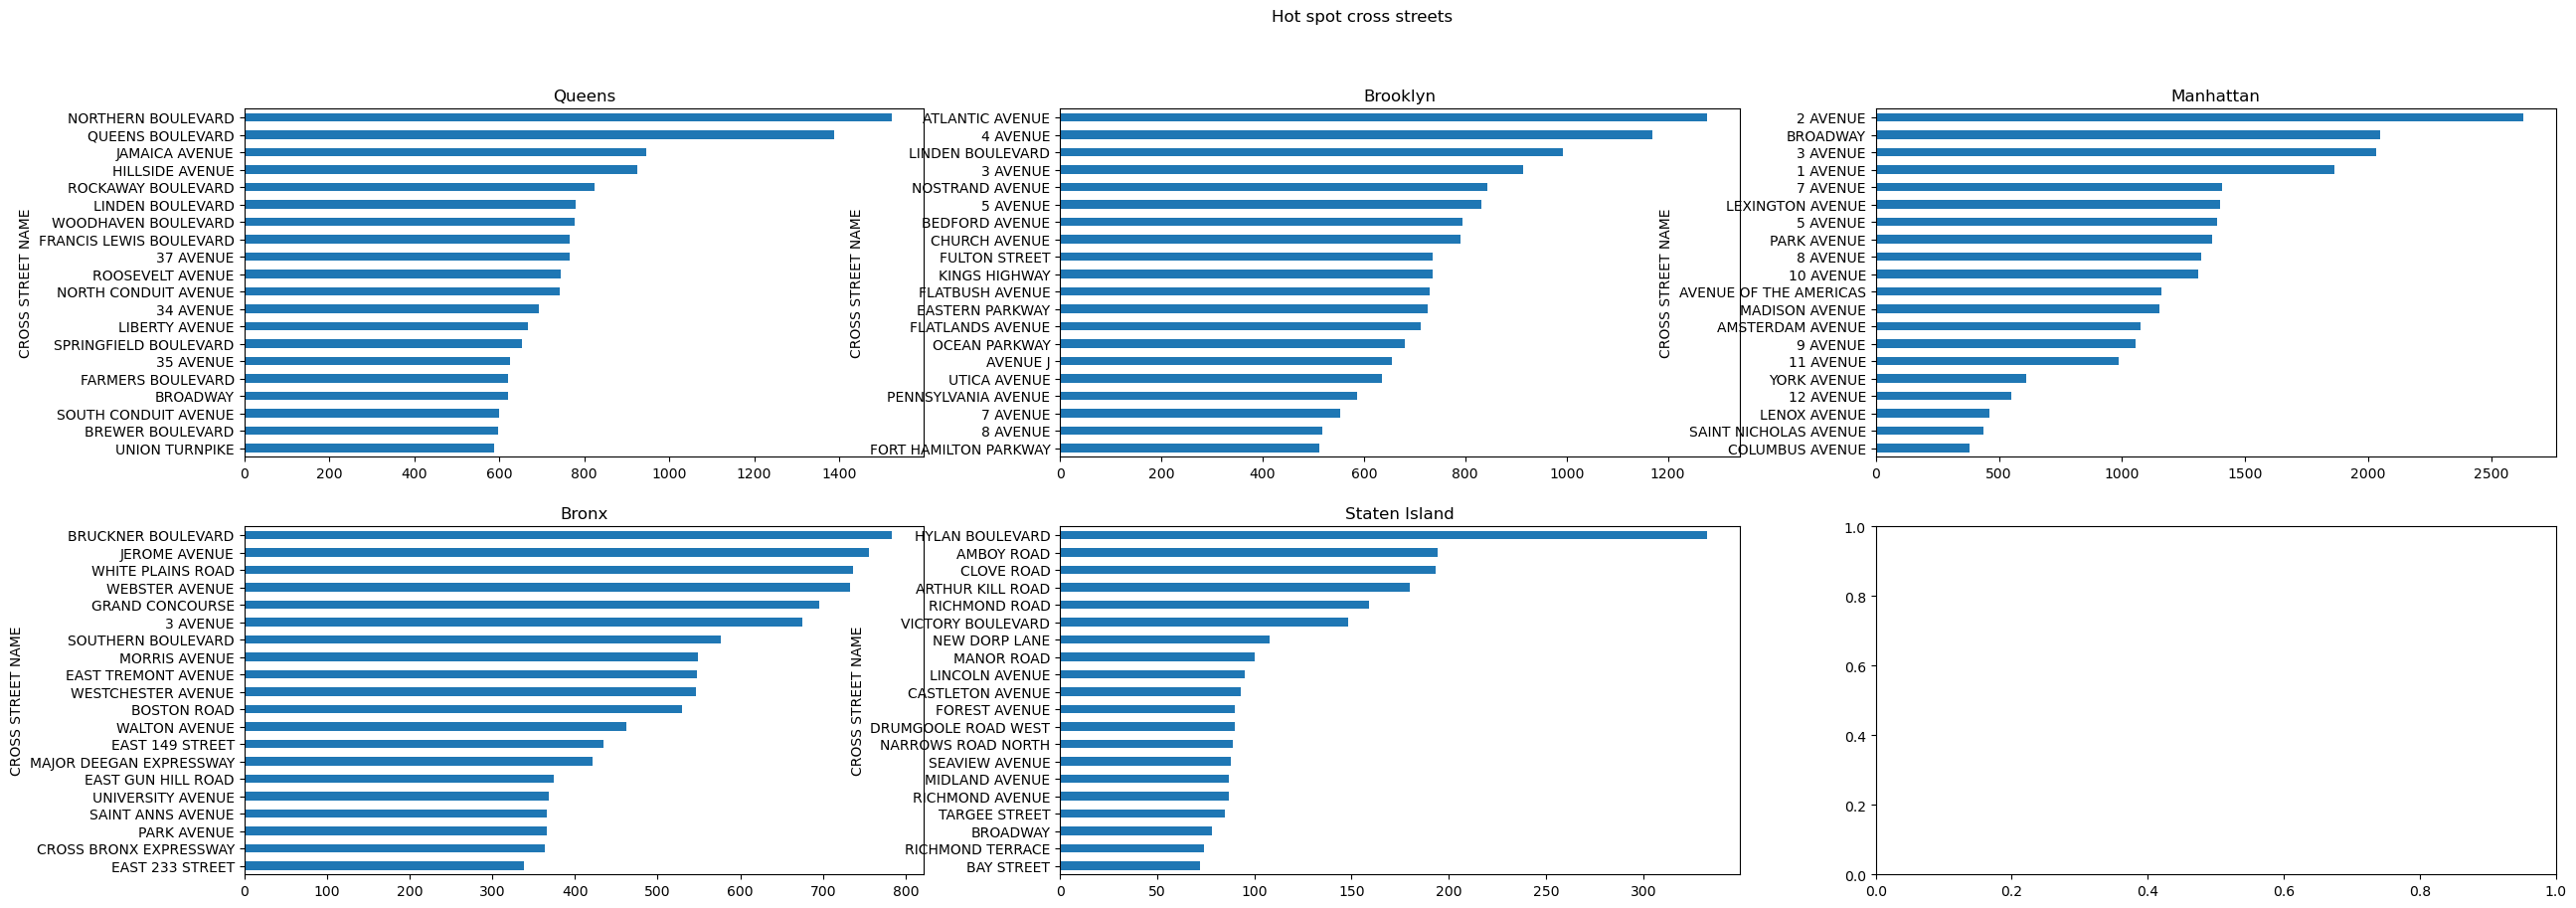

In [45]:
# Top 5 Crash Reasons

# Check if there are hotspots
fig, axs = plt.subplots(2,3, figsize=(30,10))
fig.suptitle("Hot spot cross streets")

MVC_Queens['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[0][0])
axs[0][0].set_title("Queens")

MVC_Brooklyn['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[0][1])
axs[0][1].set_title("Brooklyn")

MVC_Manhattan['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[0][2])
axs[0][2].set_title("Manhattan")

MVC_Bronx['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[1][0])
axs[1][0].set_title("Bronx")

MVC_StatenIsland['CROSS STREET NAME'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', ax=axs[1][1])
axs[1][1].set_title("Staten Island")

# Create Categories of Accident


* Attention (Sleep, Distracted, Headphones, Texting, etc.)
* Substance (Alcohol, Drugs)
* Medical (lost consciousness, illness, etc.)
* Traffic Rules (speeding, etc..)
* Nature (glare, slippery, etc.)
* Vehicle Malfunction
* External (obstructions, lane markings bad, etc.)

Text(0.5, 1.0, 'Staten Island')

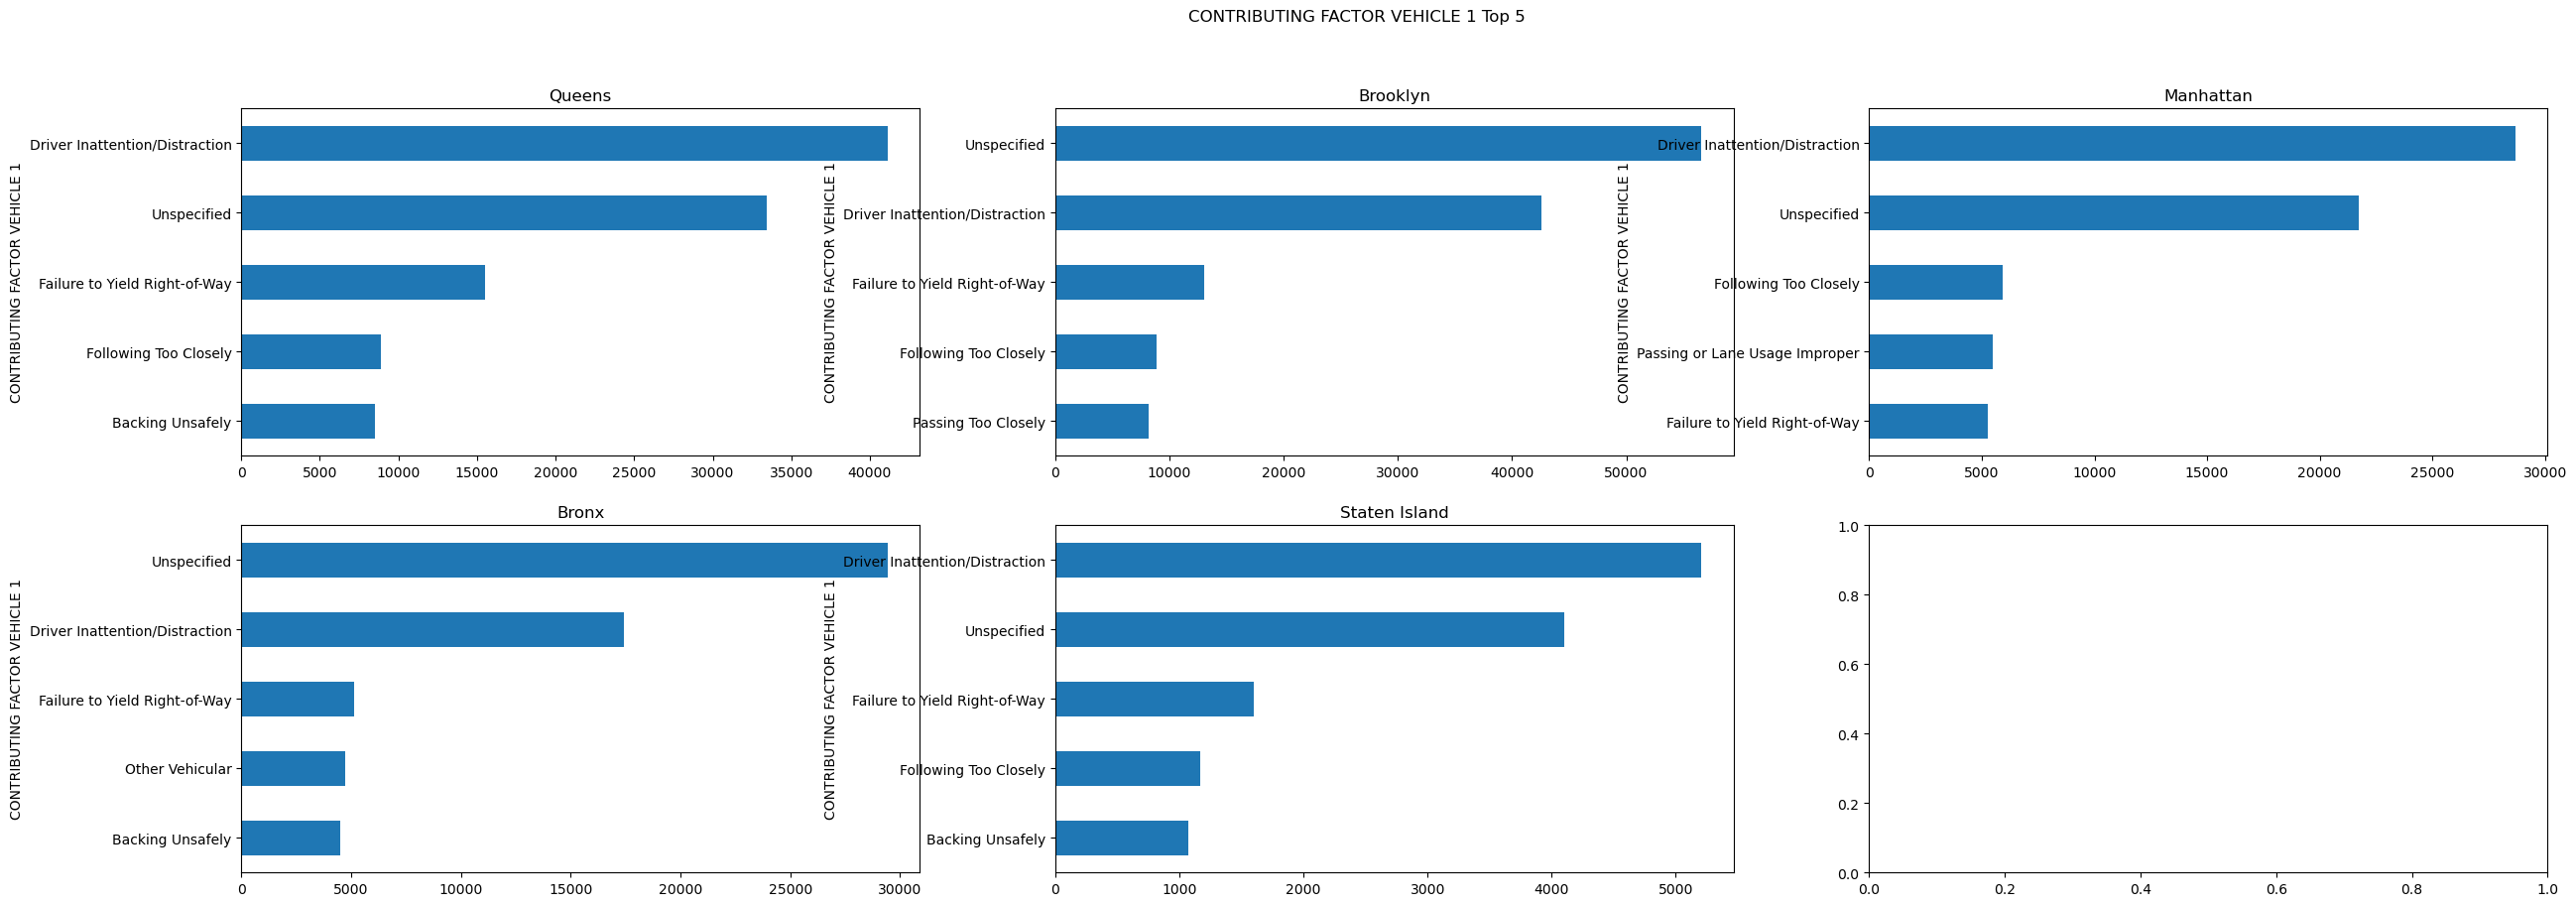

In [46]:
# Top 5 Vehicle 1 Crash Reason


fig, axs = plt.subplots(2,3, figsize=(30,10))
fig.suptitle("CONTRIBUTING FACTOR VEHICLE 1 Top 5")

MVC_Queens['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[0][0])
axs[0][0].set_title("Queens")

MVC_Brooklyn['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[0][1])
axs[0][1].set_title("Brooklyn")

MVC_Manhattan['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[0][2])
axs[0][2].set_title("Manhattan")

MVC_Bronx['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[1][0])
axs[1][0].set_title("Bronx")

MVC_StatenIsland['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[1][1])
axs[1][1].set_title("Staten Island")

In [47]:
# Top cross street Vehicle 1 crash reason caus

Text(0.5, 1.0, 'Staten Island')

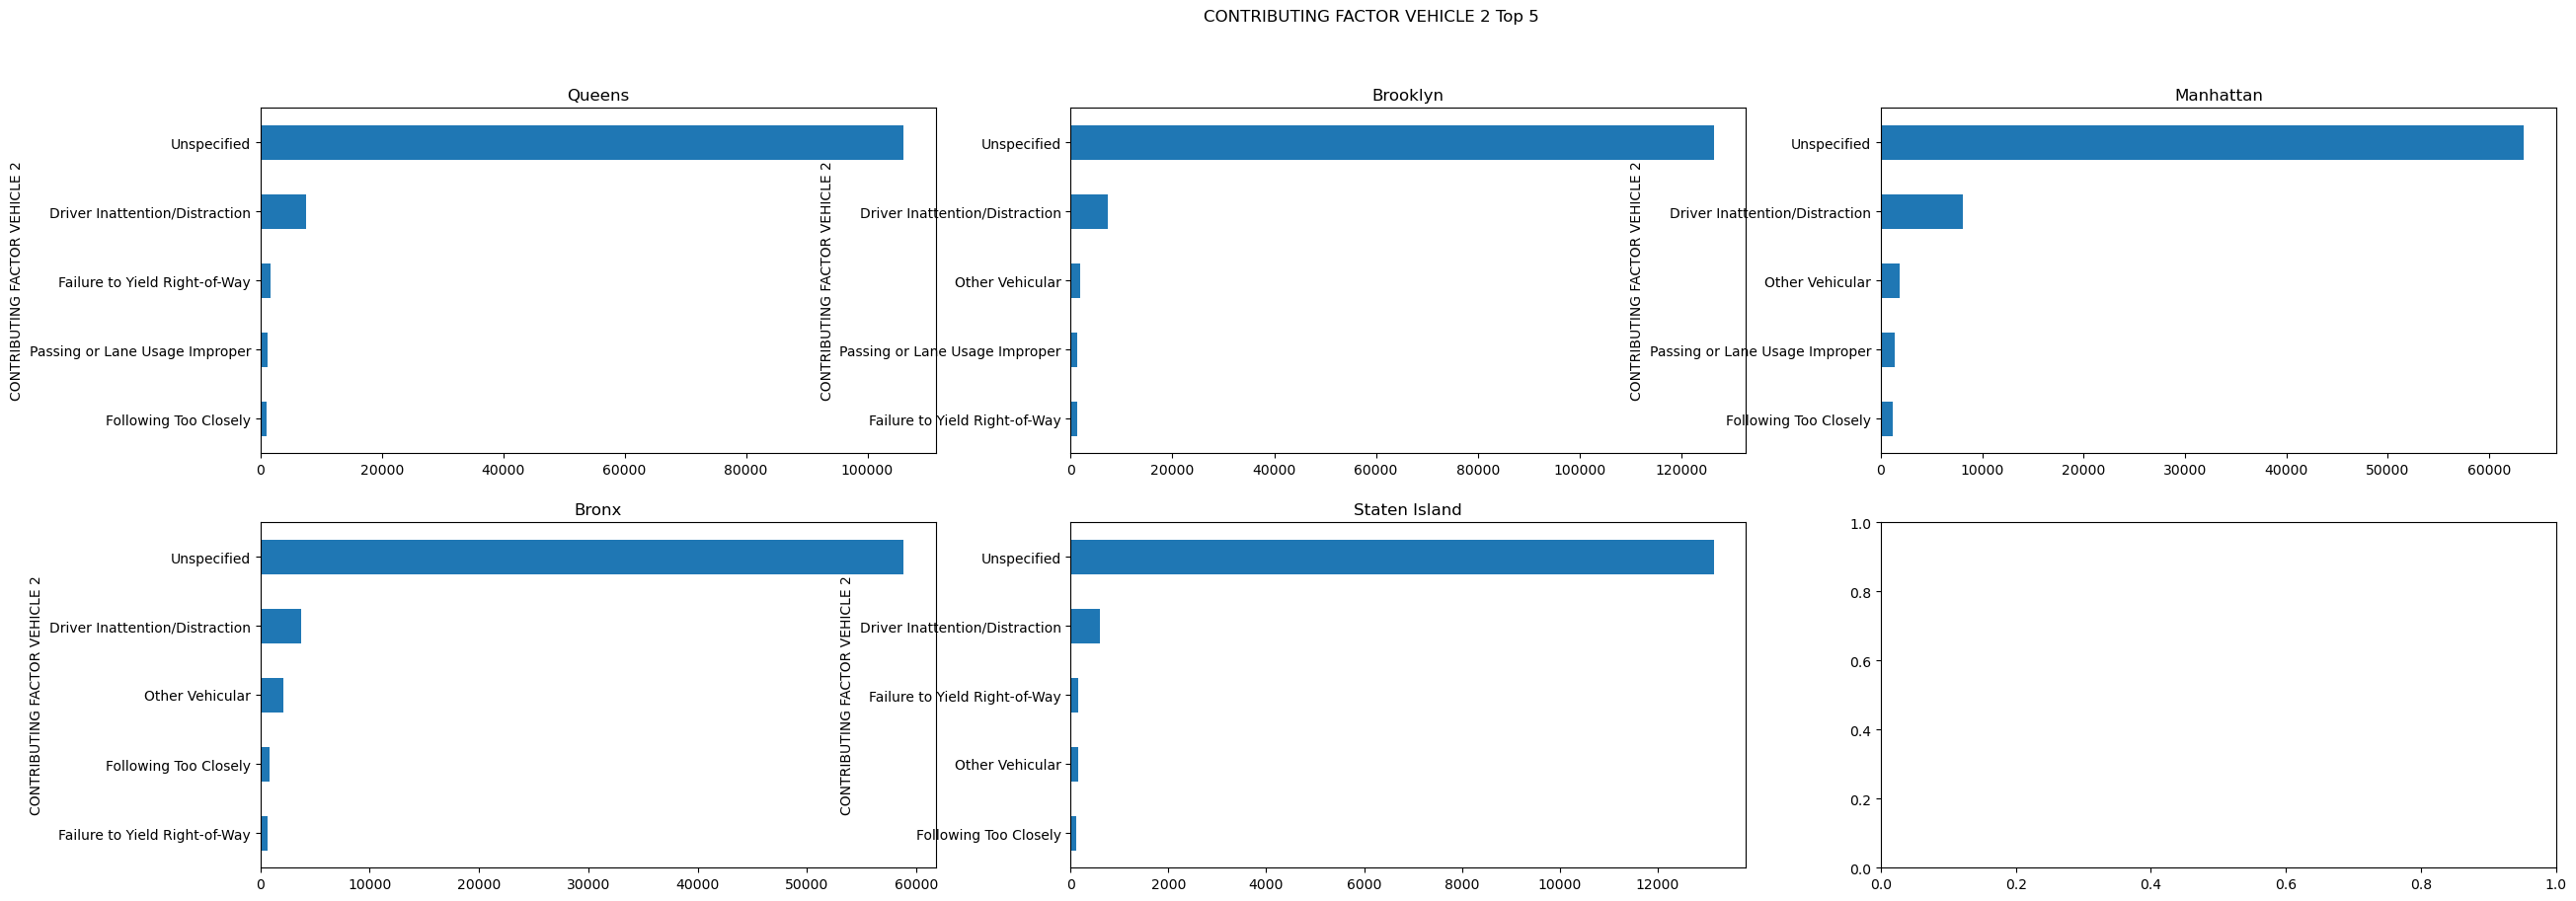

In [48]:
# Top 5 Vehicle 2 Crash Reason


fig, axs = plt.subplots(2,3, figsize=(30,10))
fig.suptitle("CONTRIBUTING FACTOR VEHICLE 2 Top 5")

MVC_Queens['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[0][0])
axs[0][0].set_title("Queens")

MVC_Brooklyn['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[0][1])
axs[0][1].set_title("Brooklyn")

MVC_Manhattan['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[0][2])
axs[0][2].set_title("Manhattan")

MVC_Bronx['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[1][0])
axs[1][0].set_title("Bronx")

MVC_StatenIsland['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh', ax=axs[1][1])
axs[1][1].set_title("Staten Island")

<Axes: >

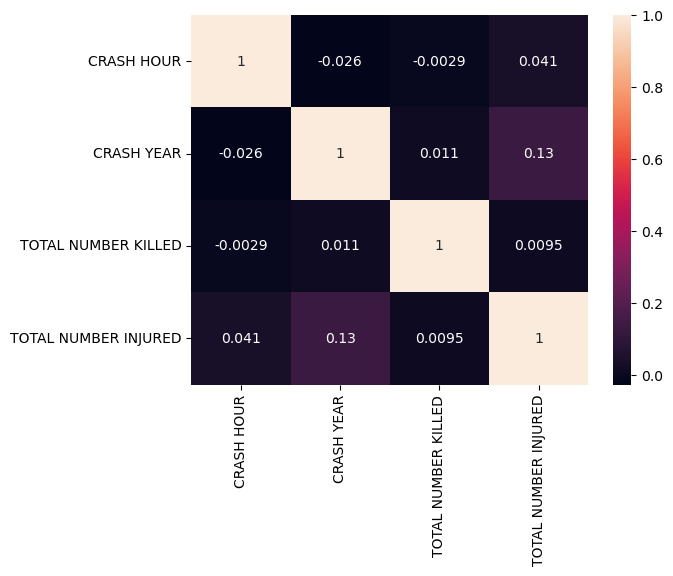

In [52]:
MVC['CRASH HOUR'] = MVC['CRASH TIME'].dt.hour
MVC['CRASH YEAR'] = MVC['CRASH DATE'].dt.year
MVC_Corr = MVC[['CRASH HOUR', 'CRASH YEAR', 'TOTAL NUMBER KILLED', 'TOTAL NUMBER INJURED']].dropna().corr()
sns.heatmap(MVC_Corr, annot=True)

### Look into injuries vs fatalities per borough
### 